3. Compressing Data via Dimensionality Reduction
4. Learning Best Practices for Model Evaluation and Hyperparameter Tuning


ref: https://github.com/ywchiu/tristar_ml/blob/master/Demo20170617.ipynb

ref: https://github.com/ywchiu/tristar_ml/blob/master/Demo20170618.ipynb

ref:https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

# Clustering and Dimensionality Reduction with Sklearn

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:


def show_split(X,Y,model,columns):
    """
        Parameters
        ------------
        X : variables
        Y : true_class
        title: plot titile
        columns: list of variable name
        [X,Y]

    """

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    plt.plot()
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
    plt.scatter(X[:, 0], X[:, 1], c=Y, alpha=1, cmap = plt.cm.RdYlBu)
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.show()

In [20]:
x_y = np.c_[load_iris().data,load_iris().target]

iris = pd.DataFrame(x_y,columns=load_iris()['feature_names']+['target_names'])



In [24]:
X = iris.iloc[:,:-1]
Y = iris.iloc[:,-1]

# standardlize and pca

特徵標準化(normalization)是將特徵資料按比例縮放，讓資料落在某一特定的區間

standard deviation normalization：
會將所有特徵數據縮放成平均為0、平方差為1

主成分分析在分析複雜數據時尤為有用，比如人臉識別。
降維可以在壓縮數據時最低程度的損失信息；
清除雜訊

In [325]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA 

In [326]:
stder = StandardScaler()
# stder = QuantileTransformer()
pca = PCA(n_components=2)

x_std = stder.fit_transform(X=X)
x_pca = pca.fit_transform(X=x_std)

# LR

In [334]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [328]:
clf = LogisticRegression()

clf.fit(x_pca,Y)

predicted = clf.predict(x_pca)
print(accuracy_score(Y,predicted))

0.8666666666666667


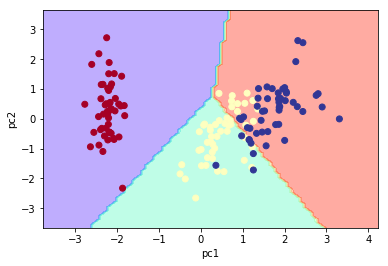

In [329]:
show_split(x_pca,Y,clf,['pc1','pc2'])

# SVM

In [53]:
from sklearn.svm import SVC

In [54]:
svc = SVC()

In [55]:
svc.fit(x_pca,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
predicted = svc.predict(x_pca)
print(accuracy_score(Y,predicted))

0.92


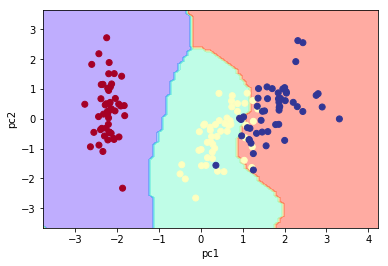

In [57]:
show_split(x_pca,Y,svc,['pc1','pc2'])

# kernelPCA

In [107]:
from sklearn.decomposition import KernelPCA

In [193]:
kpca = KernelPCA(kernel='rbf',n_components=2,gamma=0.4)

In [194]:
x_kpca = kpca.fit_transform(X)

In [195]:
svc.fit(x_kpca,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [196]:
predicted = svc.predict(x_kpca)
print(accuracy_score(Y,predicted))

0.9


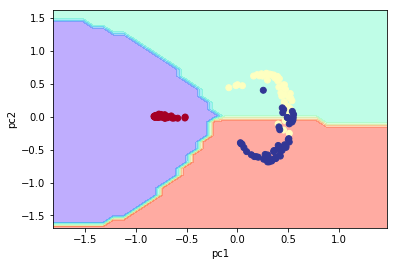

In [197]:
show_split(x_kpca,Y,svc,['pc1','pc2'])

# Clustering

In [102]:
from scipy.cluster import hierarchy as hie

Text(0,0.5,'Euclidean distances')

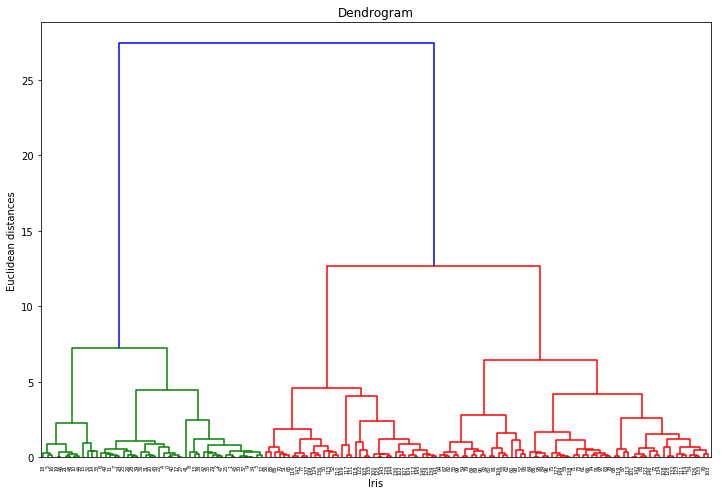

In [250]:
plt.figure(figsize=(12, 8))
dendrogram = hie.dendrogram(hie.linkage(x_pca,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Iris')
plt.ylabel('Euclidean distances')


In [204]:
from sklearn.cluster import AgglomerativeClustering

In [205]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')

In [240]:
hc_pred = hc.fit_predict(x_pca)

In [241]:
hc_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

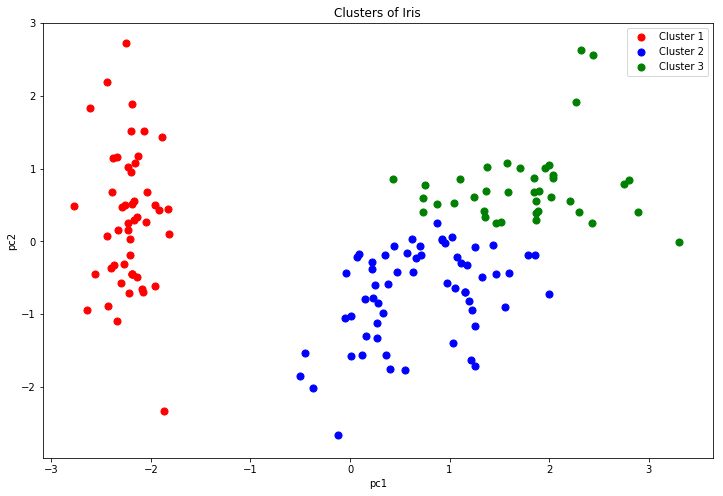

In [243]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca[hc_pred == 0, 0], x_pca[hc_pred == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(x_pca[hc_pred == 1, 0], x_pca[hc_pred == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(x_pca[hc_pred == 2, 0], x_pca[hc_pred == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

plt.title('Clusters of Iris')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()
plt.show()

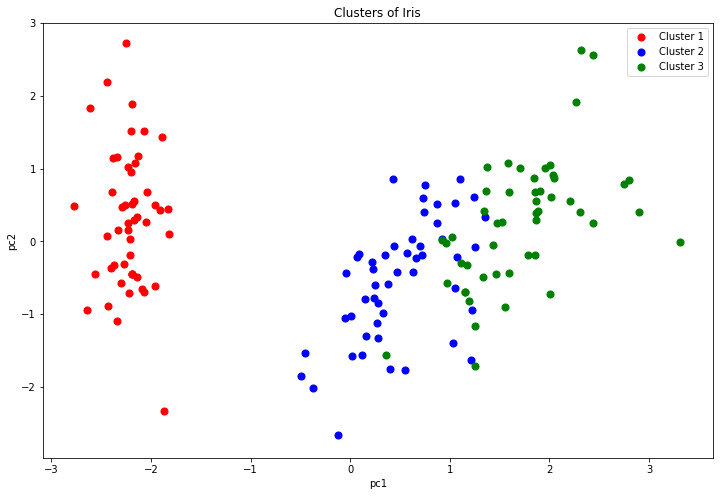

In [245]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca[Y.values == 0, 0], x_pca[Y.values == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(x_pca[Y.values == 1, 0], x_pca[Y.values == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(x_pca[Y.values == 2, 0], x_pca[Y.values == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

plt.title('Clusters of Iris')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()
plt.show()

# Kmeans

In [230]:
from sklearn.cluster import KMeans

In [246]:
kms = KMeans(n_clusters=3,random_state=15)
y_kms = kms.fit_predict(x_pca)

In [247]:
y_kms

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

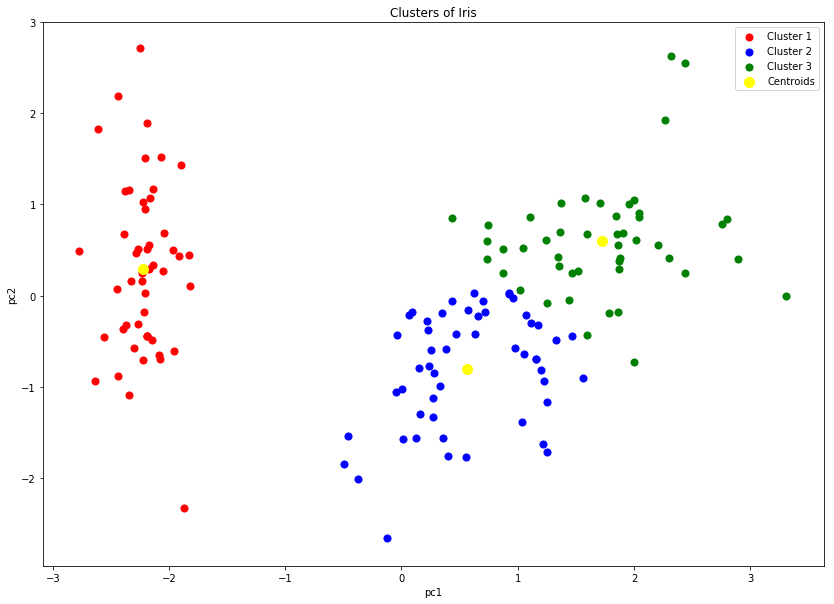

In [337]:
plt.figure(figsize=(14,10))
plt.scatter(x_pca[y_kms == 1, 0], x_pca[y_kms == 1, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(x_pca[y_kms == 2, 0], x_pca[y_kms == 2, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(x_pca[y_kms == 0, 0], x_pca[y_kms == 0, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kms.cluster_centers_[:, 0], kms.cluster_centers_[:, 1], s = 100,
            c = 'yellow', label = 'Centroids')

plt.title('Clusters of Iris')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()
plt.show()

# Hyperparameter tuning

In [255]:
# iris
# X
# Y

In [256]:
from sklearn.model_selection import train_test_split

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=15)

In [330]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [331]:
# stdr = StandardScaler()
# pca = PCA(n_components=2)
# clf = LogisticRegression()

In [332]:
pipe = make_pipeline(StandardScaler(),
                     PCA(n_components=2),
                     LogisticRegression())

In [336]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('train_score',pipe.score(X_train,y_train))
print('test_score',pipe.score(X_test,y_test))

train_score 0.85
test_score 0.9333333333333333


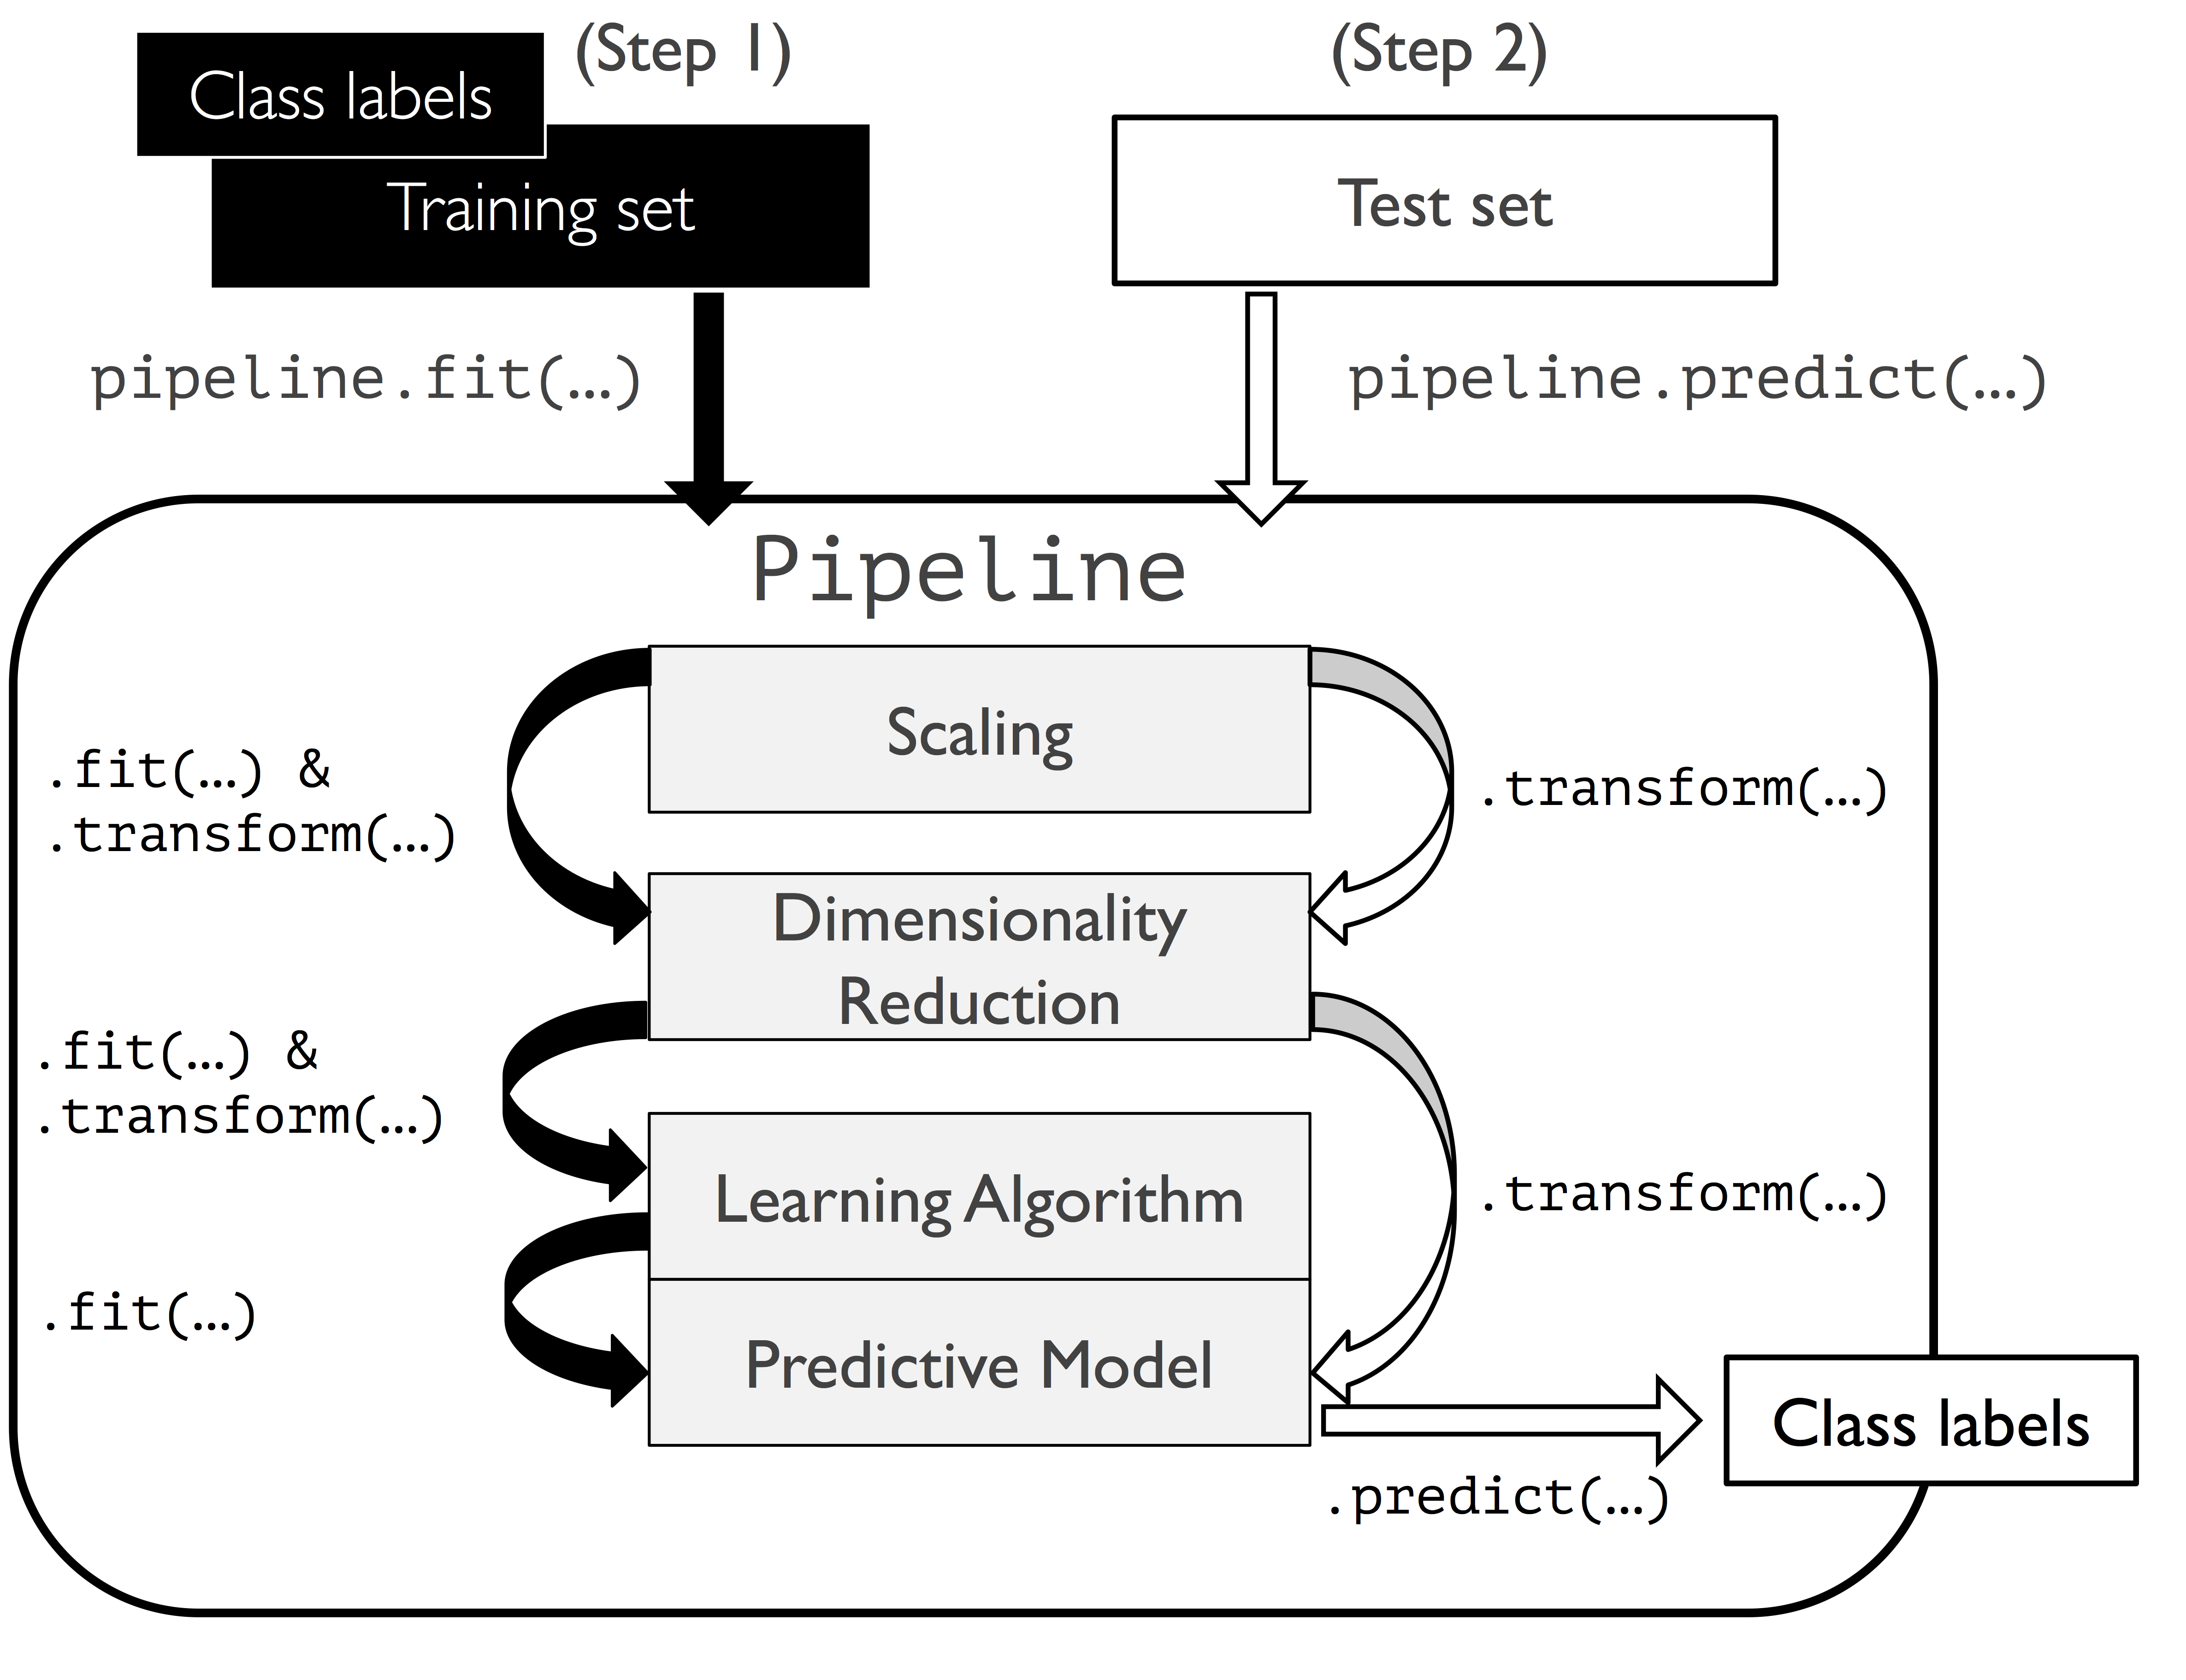

In [338]:
from IPython.display import Image
Image(filename='static/pipe.png', width=500)

In [339]:
from sklearn.model_selection import GridSearchCV
# 暴力姐（解）！

In [386]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'logisticregression__C': param_range,
              'logisticregression__solver': ['liblinear','newton-cg','lbfgs']}]



In [391]:
gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
#                  cv=10,
                 scoring='accuracy')

In [392]:
gs.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_inte...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'logisticregression__solver': ['liblinear', 'newton-cg', 'lbfgs']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [393]:
print(gs.best_score_)

0.85


In [394]:
print(gs.best_params_)

{'logisticregression__C': 10.0, 'logisticregression__solver': 'newton-cg'}


# NN (lots of NN ==>Deeeeeep learning)

In [62]:
from sklearn.neural_network import MLPClassifier

In [95]:
nn_clf = MLPClassifier(hidden_layer_sizes=(32,16,8,16,32), activation='logistic', max_iter = 10000)

In [423]:
nn_clf = MLPClassifier(hidden_layer_sizes=(10),
                       solver='adam', 
                       activation='logistic',
                       learning_rate_init=0.017,
                       max_iter=500)



In [424]:
nn_clf.fit(x_pca,Y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.017, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [425]:
predicted = nn_clf.predict(x_pca)
print(accuracy_score(Y,predicted))

0.9266666666666666


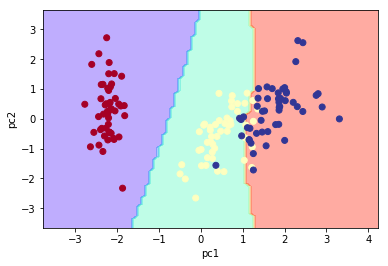

In [426]:
show_split(x_pca,Y,nn_clf,['pc1','pc2'])